In [359]:
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [355]:
weight_df = pd.read_csv(r"C:\Users\edtech3.EDTECH\Downloads\Dataset.csv")

weight_df = pd.DataFrame(rows, columns=['Weight'])
weight_df.drop(index=0, inplace=True)
weight_df['Weight'] = weight_df['Weight'].astype('int')

ranges = [140, 150, 160, 170, 180, 190, 200, 210]
range_boundary = [x - 0.5 for x in ranges[:-1]] + [ranges[-1] + 0.5]
range_mark = [(ranges[1] + ranges[i+1])/2 for i in range(len(ranges) - 1)]

weight_cut_normal = pd.cut(weight_df['Weight'], bins=ranges)
print(weight_cut_normal.value_counts().sort_index().to_frame().reset_index())
weight_cut = pd.cut(weight_df['Weight'], bins=range_boundary)
weight_cut = weight_cut.value_counts().sort_index().to_frame().reset_index()

weight_cut['Class Mark'] = range_mark
weight_cut['Cumulative Frequency =>'] = weight_cut['count'].cumsum()
weight_cut['Cumulative Frequency <='] = weight_cut.loc[::-1, 'count'].cumsum()[::-1]
weight_cut.rename(columns={'count': 'Frequency'}, inplace=True)
print(weight_cut)

       Weight  count
0  (140, 150]     70
1  (150, 160]    278
2  (160, 170]     98
3  (170, 180]     41
4  (180, 190]      9
5  (190, 200]      2
6  (200, 210]      2
           Weight  Frequency  Class Mark  Cumulative Frequency =>  \
0  (139.5, 149.5]         45       150.0                       45   
1  (149.5, 159.5]        291       155.0                      336   
2  (159.5, 169.5]        106       160.0                      442   
3  (169.5, 179.5]         43       165.0                      485   
4  (179.5, 189.5]         11       170.0                      496   
5  (189.5, 199.5]          2       175.0                      498   
6  (199.5, 210.5]          2       180.0                      500   

   Cumulative Frequency <=  
0                      500  
1                      455  
2                      164  
3                       58  
4                       15  
5                        4  
6                        2  


# Histogram

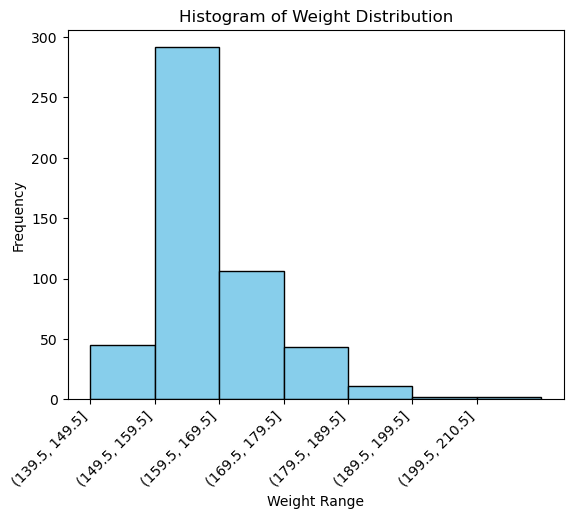

In [408]:
bins = weight_cut['Weight'].astype(str)
plt.bar(bins, weight_cut['Frequency'], color='skyblue', edgecolor='black', align='edge', width=1)
plt.title('Histogram of Weight Distribution')
plt.xlabel('Weight Range')
plt.ylabel('Frequency')

plt.xticks(rotation=45, ha='right')

plt.show()

# Frequency Polygon

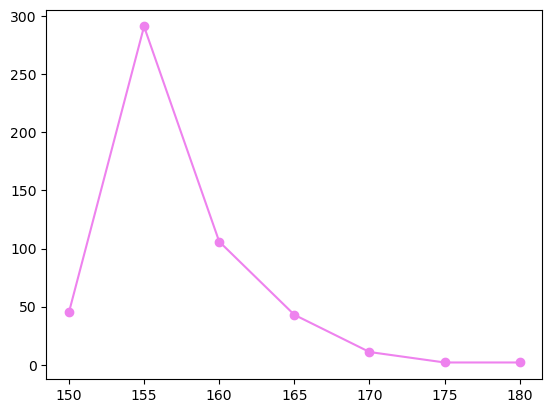

In [363]:
plt.plot(range_mark, weight_cut['Frequency'], marker = 'o', linestyle = '-', color = 'violet')

# Ogives

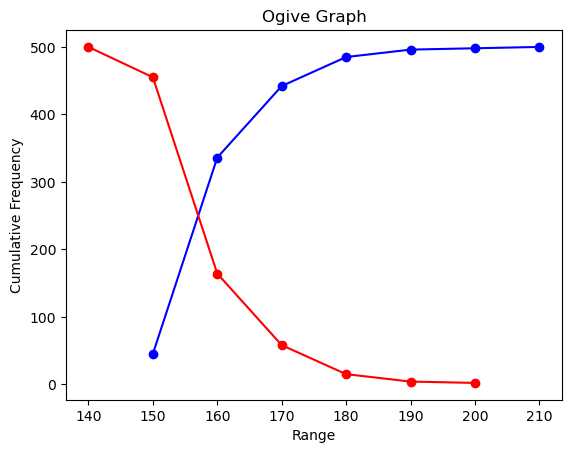

In [386]:
plt.plot(ranges[1:], weight_cut['Cumulative Frequency =>'], color='blue', marker='o', linestyle='-')
plt.plot(ranges[:-1], weight_cut['Cumulative Frequency <='], color='red', marker='o', linestyle='-')
plt.title('Ogive Graph')
plt.xlabel('Range')
plt.ylabel('Cumulative Frequency')
plt.show()